# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 578


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | abqaiq
Processing Record 3 of Set 1 | wailua homesteads
Processing Record 4 of Set 1 | aasiaat
Processing Record 5 of Set 1 | nemuro
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | grytviken
Processing Record 8 of Set 1 | shingu
Processing Record 9 of Set 1 | fort bragg
Processing Record 10 of Set 1 | sechura
Processing Record 11 of Set 1 | adamstown
Processing Record 12 of Set 1 | whitehorse
Processing Record 13 of Set 1 | puerto natales
Processing Record 14 of Set 1 | odda
Processing Record 15 of Set 1 | tranovaho
City not found. Skipping...
Processing Record 16 of Set 1 | falenki
Processing Record 17 of Set 1 | alofi
Processing Record 18 of Set 1 | buala
Processing Record 19 of Set 1 | vinita
Processing Record 20 of Set 1 | cargados carajos
City not found. Skipping...
Processing Record 21 of Set 1 | ottawa
Processing Record 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          548
Lat           548
Lng           548
Max Temp      548
Humidity      548
Cloudiness    548
Wind Speed    548
Country       548
Date          548
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,1.90,65,100,7.31,TF,1690661607
1,abqaiq,25.9371,49.6776,32.67,30,0,2.14,SA,1690661607
2,wailua homesteads,22.0669,-159.3780,27.24,87,75,8.23,US,1690661607
3,aasiaat,68.7098,-52.8699,2.87,92,94,2.96,GL,1690661607
4,nemuro,43.3236,145.5750,18.06,97,98,2.80,JP,1690661608


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,1.90,65,100,7.31,TF,1690661607
1,abqaiq,25.9371,49.6776,32.67,30,0,2.14,SA,1690661607
2,wailua homesteads,22.0669,-159.3780,27.24,87,75,8.23,US,1690661607
3,aasiaat,68.7098,-52.8699,2.87,92,94,2.96,GL,1690661607
4,nemuro,43.3236,145.5750,18.06,97,98,2.80,JP,1690661608


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

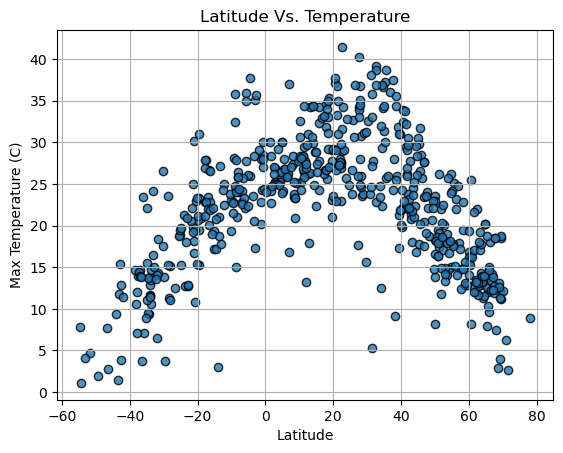

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor= "black",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("Latitude Vs. Temperature")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

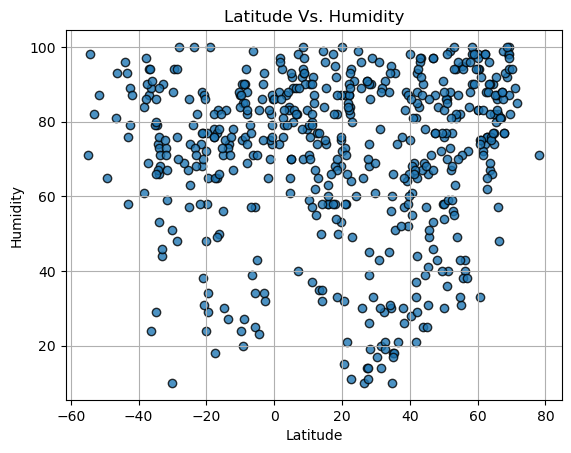

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor= "black",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("Latitude Vs. Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

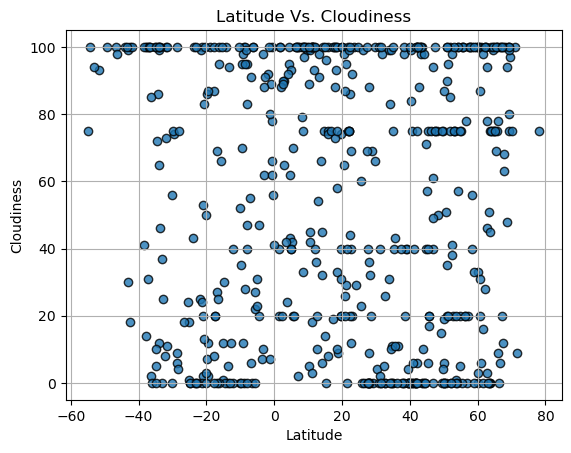

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor= "black",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("Latitude Vs. Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

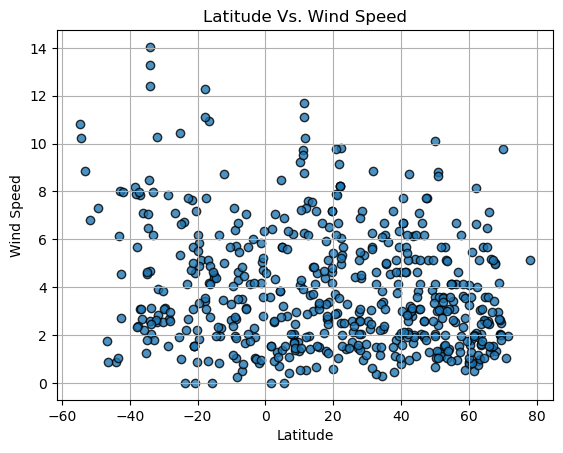

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    edgecolor= "black",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("Latitude Vs. Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def linear_plot_regression(x,y, coordinates,xtitle, ytitle):
    (slope, intercept,rvalue, pvalue,ste) = linregress(x,y)
    regressionline = slope * x + intercept
    equation = f"y={round(slope,2)} * x + {round(intercept,2)}"
    
    plt.scatter(x, y, color='blue', label='Data')
    plt.plot(x, regressionline, color='red')
    plt.xlabel(xtitle)
    plt.ylabel(ytitle)
    plt.title('Linear Regression Plot')
    plt.legend()
    plt.annotate(equation, coordinates, fontsize=10, color='blue')
    plt.grid(True)
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,abqaiq,25.9371,49.6776,32.67,30,0,2.14,SA,1690661607
2,wailua homesteads,22.0669,-159.3780,27.24,87,75,8.23,US,1690661607
3,aasiaat,68.7098,-52.8699,2.87,92,94,2.96,GL,1690661607
4,nemuro,43.3236,145.5750,18.06,97,98,2.80,JP,1690661608
5,albany,42.6001,-73.9662,27.75,84,88,3.23,US,1690661568


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,1.90,65,100,7.31,TF,1690661607
6,grytviken,-54.2811,-36.5092,1.10,98,100,10.23,GS,1690661608
9,sechura,-5.5569,-80.8222,27.74,57,27,7.05,PE,1690661609
10,adamstown,-25.0660,-130.1015,18.80,57,18,10.43,PN,1690661609
12,puerto natales,-51.7236,-72.4875,4.75,87,93,6.80,CL,1690661609


###  Temperature vs. Latitude Linear Regression Plot

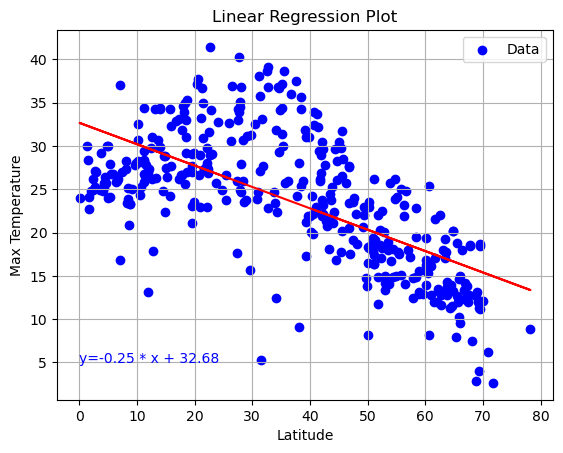

In [16]:
# Linear regression on Northern Hemisphere
coordinates=(0,5)
lat = northern_hemi_df['Lat']
maxtemp = northern_hemi_df['Max Temp']
xtitle = "Latitude"
ytitle = "Max Temperature"
linear_plot_regression(lat,maxtemp, coordinates,xtitle,ytitle)

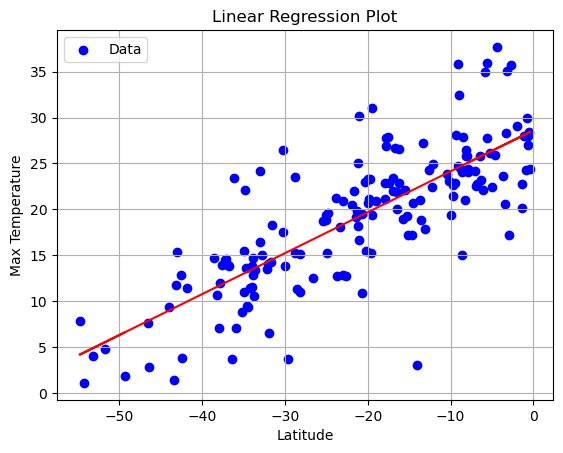

In [17]:
# Linear regression on Southern Hemisphere
coordinates=(-20,-5)
lat = southern_hemi_df['Lat']
maxtemp = southern_hemi_df['Max Temp']
xtitle = "Latitude"
ytitle = "Max Temperature"
linear_plot_regression(lat,maxtemp, coordinates,xtitle,ytitle)

**Discussion about the linear relationship:** There is a greatly decreasing slope in the northern hemisphere for temperature vs latitude. In the southern hemisphere, there is a greatly increasing slope for temperature vs latitude. This means temperature decreases the further away from equator.

### Humidity vs. Latitude Linear Regression Plot

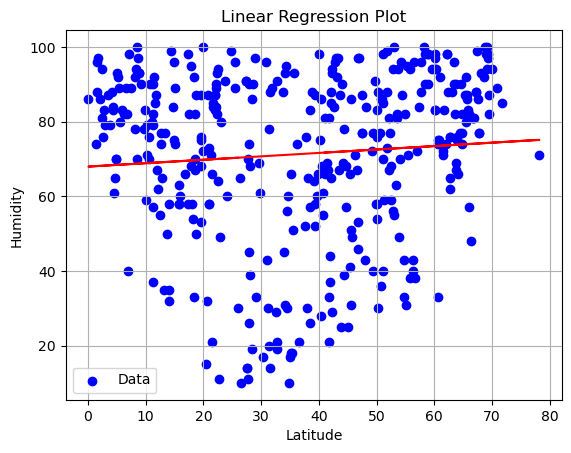

In [18]:
# Northern Hemisphere
coordinates=(0,5)
lat = northern_hemi_df['Lat']
humidity = northern_hemi_df['Humidity']
xtitle = "Latitude"
ytitle = "Humidity"
linear_plot_regression(lat,humidity, coordinates,xtitle,ytitle)

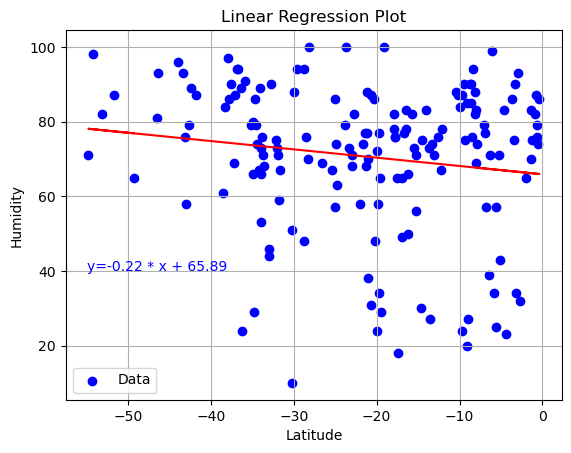

In [19]:
# Southern Hemisphere
coordinates=(-55,40)
lat = southern_hemi_df['Lat']
humidity = southern_hemi_df['Humidity']
xtitle = "Latitude"
ytitle = "Humidity"
linear_plot_regression(lat,humidity, coordinates,xtitle,ytitle)

**Discussion about the linear relationship:** There is a slightly increasing slope in the northern hemisphere for humidity vs latitude. In the southern hemisphere, there is a slightly decreasing slope for humidity vs latitude. This means humidity increases slightly the further away from equator.

### Cloudiness vs. Latitude Linear Regression Plot

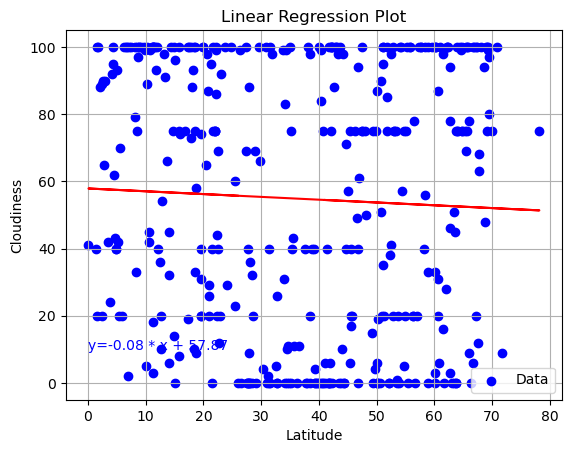

In [20]:
# Northern Hemisphere
coordinates=(0,10)
lat = northern_hemi_df['Lat']
cloudiness = northern_hemi_df['Cloudiness']
xtitle = "Latitude"
ytitle = "Cloudiness"
linear_plot_regression(lat,cloudiness, coordinates,xtitle,ytitle)

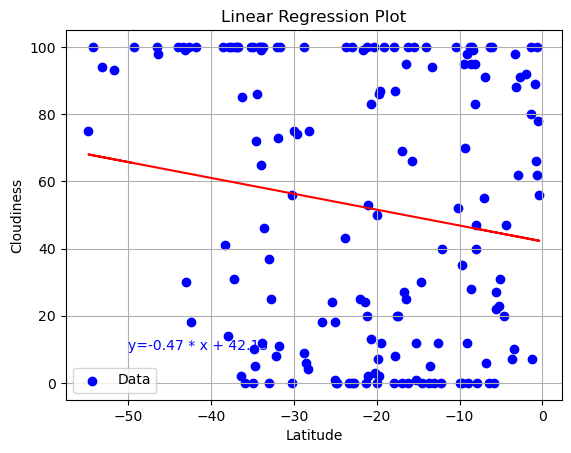

In [21]:
# Southern Hemisphere
coordinates=(-50,10)
lat = southern_hemi_df['Lat']
cloudiness = southern_hemi_df['Cloudiness']
xtitle = "Latitude"
ytitle = "Cloudiness"
linear_plot_regression(lat,cloudiness, coordinates,xtitle,ytitle)

**Discussion about the linear relationship:** There is no clear relationship in either the northern or southern hemispheres that show a pattern of cloudiness vs latitude.

### Wind Speed vs. Latitude Linear Regression Plot

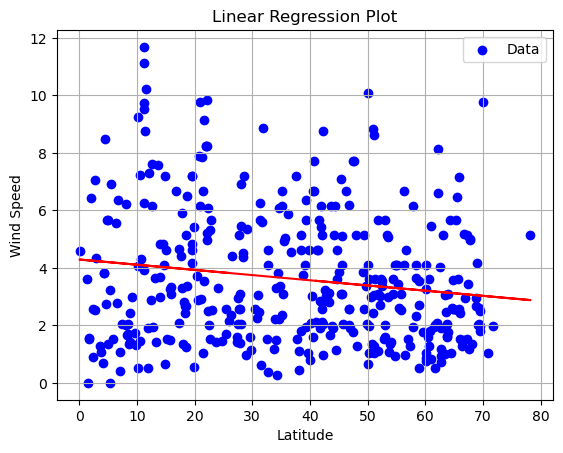

In [22]:
# Northern Hemisphere
coordinates=(0,12.5)
lat = northern_hemi_df['Lat']
windspeed = northern_hemi_df['Wind Speed']
xtitle = "Latitude"
ytitle = "Wind Speed"
linear_plot_regression(lat,windspeed, coordinates,xtitle,ytitle)

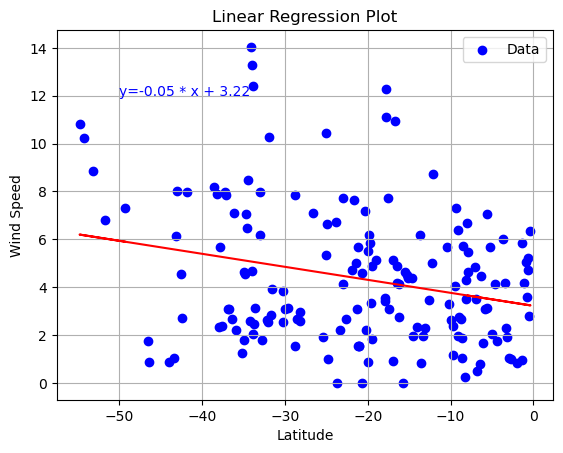

In [23]:
# Southern Hemisphere
coordinates=(-50,12)
lat = southern_hemi_df['Lat']
windspeed = southern_hemi_df['Wind Speed']
xtitle = "Latitude"
ytitle = "Wind Speed"
linear_plot_regression(lat,windspeed, coordinates,xtitle,ytitle)

**Discussion about the linear relationship:** Wind speeds in general, are higher the lower the latitude and continue decreasing as you move higher in latitude. The southern hemisphere has higher wind speeds than the northern hemisphere.